<a href="https://colab.research.google.com/github/matteoxpo/MLStudy/blob/main/KNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
print(raw_df)

KeyError: 'DESCR'

In [ ]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [ ]:
from matplotlib import pyplot as plt

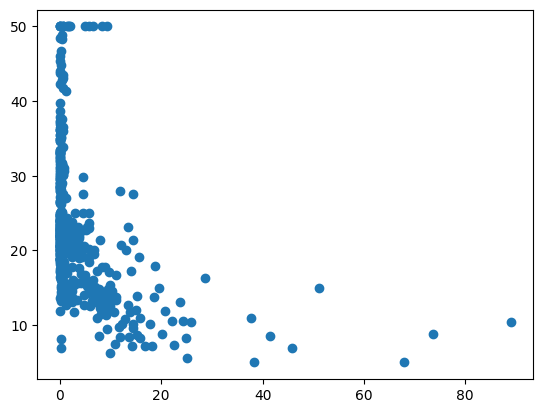

In [ ]:
plt.scatter(data[:, 0], target)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)
print(type(X_train))
print(type(X_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5, weights="uniform", p = 2)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
knn.predict(X_test)

array([21.86, 31.7 , 21.38, 35.9 , 39.08, 16.24, 31.7 , 11.34, 28.82,
       22.32, 35.04, 21.92, 24.74, 27.82, 11.74, 19.46, 24.54, 14.48,
       18.7 , 21.44, 24.56, 28.86, 24.2 , 14.84, 39.02, 14.9 , 16.48,
       24.26, 35.14, 10.36, 12.58, 27.36, 24.36, 20.56, 29.94,  9.82,
       24.16, 33.82, 33.12, 16.8 ,  8.8 , 15.04, 12.26, 13.18, 21.58,
       21.6 , 29.42, 19.02, 17.8 , 28.88, 18.18, 25.18, 19.46, 16.06,
       14.48, 31.06, 28.86, 17.52, 14.78, 31.62, 45.58, 21.96,  8.8 ,
       21.76, 22.8 , 28.88, 18.38, 24.36, 28.28, 21.66, 24.5 , 18.38,
       23.54, 26.74, 24.48, 10.68, 21.26, 18.18, 19.16, 26.1 , 18.86,
       25.54, 23.92, 28.72, 33.24,  8.76, 17.52, 23.52, 15.36, 24.86,
       29.96, 31.14, 25.44, 31.62, 17.24, 17.42, 22.6 , 20.58, 20.4 ,
       20.62, 26.02, 12.22])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(Y_test, knn.predict(X_test))

46.53385490196079

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_searcher = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
      "n_neighbors": [1, 5, 10, 20],
      "weights": ["uniform", "distance"],
      'p': [1, 2, 3]
  },
    cv=5
)

In [ ]:
grid_searcher.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5, 10, 20], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid_searcher.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [ ]:
mean_squared_error(Y_test, grid_searcher.predict(X_test))

35.79459500003122

In [ ]:
MSE = []
for i in range(1, 30, 3):
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(X_train, Y_train)
  MSE.append(mean_squared_error(Y_test, knn.predict(X_test)))

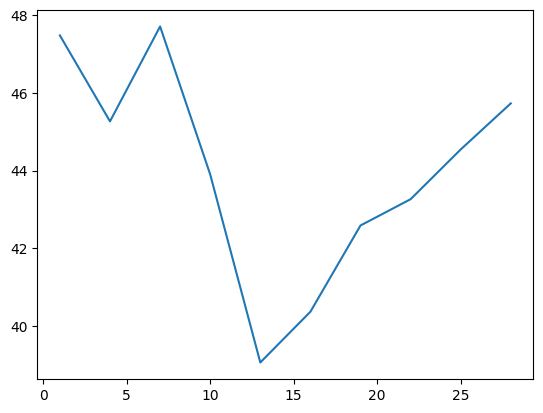

In [ ]:
plt.plot(range(1, 30, 3), MSE)

### Теперь попробуем решить задачу классификации

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, Y = make_moons(n_samples=1000, noise=0.25)

In [ ]:
X.shape

(1000, 2)

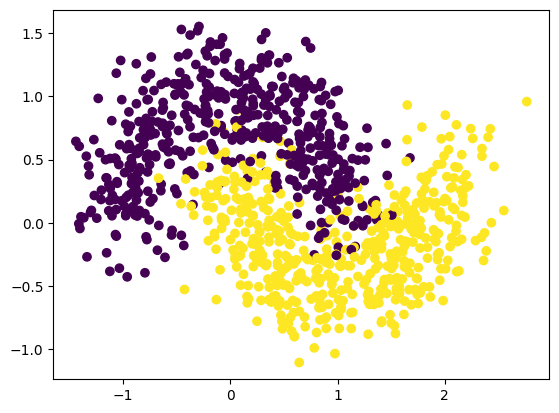

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=Y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
knn.predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, knn.predict(X_test))

0.92

In [ ]:
import numpy as np

In [ ]:
x_space = np.linspace(-2, 3, 100)

In [ ]:
x_grid, y_grid = np.meshgrid(x_space,x_space)

In [ ]:
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2)

In [ ]:
xy

array([[-2.        , -2.        ],
       [-1.94949495, -2.        ],
       [-1.8989899 , -2.        ],
       ...,
       [ 2.8989899 ,  3.        ],
       [ 2.94949495,  3.        ],
       [ 3.        ,  3.        ]])

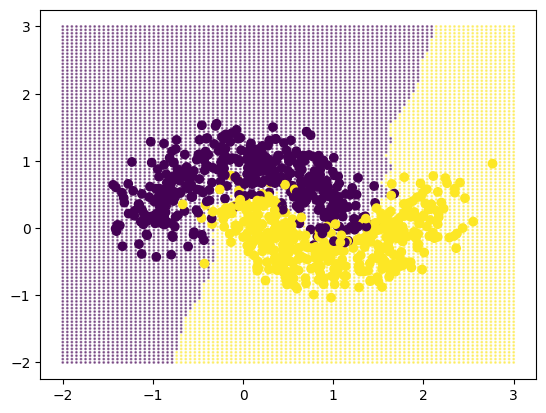

In [ ]:
plt.scatter(xy[:,0], xy[:,1], s=1,alpha=0.5, c=knn.predict(xy))
plt.scatter(X_train[:,0], X_train[:,1],c =Y_train)